# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape,num_neurons = [512,256,128],output_units = 10 ):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i,n_units in enumerate (num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = 'relu',  name = 'hidden_layer'+str(i+1))(input_layer)
        else :
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = 'hidden_layer'+str(i+1))(x)
    output = keras.layers.Dense(units = output_units, activation = 'softmax', name = 'output')(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [output])
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = [0.01,0.0001,1e-6]
MOMENTUM = 0.95

In [13]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print('The learning rate is %.6f' % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.Adam(lr = lr)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = opt)
    
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size= BATCH_SIZE,
             validation_data = (x_test,y_test),
              shuffle = True)
    train_loss = model.history.history['loss']
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    name_tag = "exp-adam-lr--%s" % str(lr)
    results[name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print('The learning rate is %.6f' % (lr))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(lr = lr, momentum = MOMENTUM, nesterov=True)
    model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = opt)
    
    model.fit(x_train,y_train,
             epochs = EPOCHS,
             batch_size= BATCH_SIZE,
             validation_data = (x_test,y_test),
              shuffle = True)
    train_loss = model.history.history['loss']
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    name_tag = "exp-sgd-lr--%s" % str(lr)
    results[name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

The learning rate is 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 15ms/step - loss: 6.6959 - acc

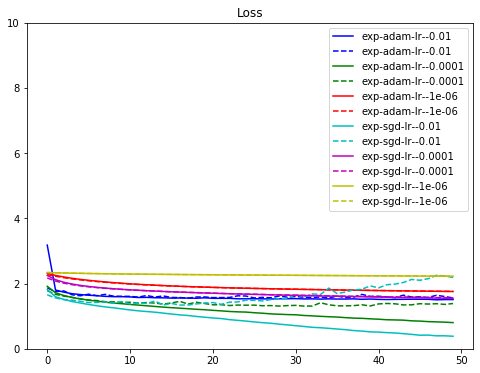

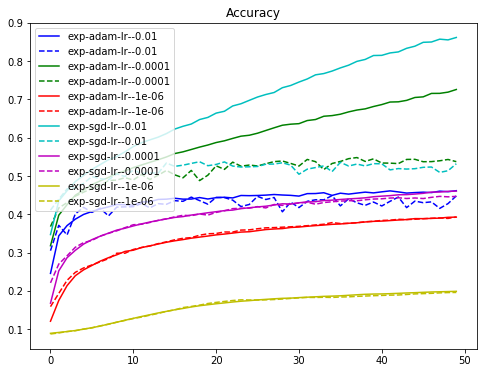

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ['b','g','r','c','m','y']
plt.figure(figsize = (8,6))
for i, cond in enumerate (results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'],'-',label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'],'--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend()
plt.ylim([0,10])
plt.show()

plt.figure(figsize =(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()